In [ ]:
import pandas as pd
import datetime as dt
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy import stats
from  scipy.stats import skew, kurtosis, shapiro
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from statsmodels.tsa.seasonal import seasonal_decompose

Hoje, após a construção e a melhoria de diversas refinarias no Brasil, o país possui maiores habilidades para processar esse petróleo pesado, o que faz com que a necessidade de importar, ainda que existente, seja menor. Ainda assim, a exportação de petróleo é bastante recorrente no Brasil.

Esta denominação abrange os seguintes derivados: GLP, gasolina A, gasolina de aviação, querosene iluminante, QAV, óleo diesel, óleo combustível e coque.

Frequência: Mensal de 1996.01 até 2023.06

Frequência: Mensal de 1996.01 até 2023.06

## Leitura dos Datasets

In [ ]:
df_exportacao = pd.read_excel('/content/Exportação de petroleo e derivados.xls').copy()
df_exportacao

,Data,Exportações - derivados do petróleo - (FOB) - US$ (milhões) - Fundação Centro de Estudos do Comércio Exterior (Funcex) - FUNCEX12_XVPETCOMB2N12 -
0,1996.01,57.1968
1,1996.02,52.8505
2,1996.03,47.1377
3,1996.04,20.3831
4,1996.05,33.8390
...,...,...
325,2023.02,1087.4795
326,2023.03,891.8244
327,2023.04,813.8720
328,2023.05,1508.3198


In [ ]:
df_importacao = pd.read_excel('/content/importação de petroleo e derivados.xls').copy()
df_importacao

,Data,Importações - derivados do petróleo - (FOB) - US$ (milhões) - Fundação Centro de Estudos do Comércio Exterior (Funcex) - FUNCEX12_MVPETCOMB2N12 -
0,1996.01,163.9928
1,1996.02,179.0493
2,1996.03,292.3198
3,1996.04,284.6064
4,1996.05,252.0194
...,...,...
325,2023.02,1869.2662
326,2023.03,2134.9638
327,2023.04,1405.8209
328,2023.05,1868.5382


In [ ]:
df_consumo = pd.read_excel('/content/Consumo de petroleo e derivados.xls').copy()
df_consumo

,Data,Consumo aparente - derivados de petróleo - média - quantidade/dia - Barril (mil) - Agência Nacional do Petróleo (ANP) - ANP12_CDEPET12 -
0,1979.01,1121
1,1979.02,1044
2,1979.03,1034
3,1979.04,1073
4,1979.05,1098
...,...,...
529,2023.02,2066
530,2023.03,2145
531,2023.04,1945
532,2023.05,2139


In [ ]:
df_producao = pd.read_excel('/content/Produção de Petroleo e derivados.xls').copy()
df_producao

,Data,Produção - petróleo - média - quantidade/dia - Barril (mil) - Agência Nacional do Petróleo (ANP) - ANP12_PDPET12 -
0,1979.01,161
1,1979.02,167
2,1979.03,164
3,1979.04,165
4,1979.05,166
...,...,...
529,2023.02,3342
530,2023.03,3193
531,2023.04,3220
532,2023.05,3286


## Mundaça de nos das Colunas

In [ ]:
df_exportacao.rename(columns={'Exportações - derivados do petróleo - (FOB) - US$ (milhões)  - Fundação Centro de Estudos do Comércio Exterior (Funcex) - FUNCEX12_XVPETCOMB2N12 - ': 'Exportação'}, inplace=True)

In [ ]:
df_importacao.rename(columns={'Importações - derivados do petróleo - (FOB) - US$ (milhões)  - Fundação Centro de Estudos do Comércio Exterior (Funcex) - FUNCEX12_MVPETCOMB2N12 - ': 'Importação'}, inplace=True)

In [ ]:
df_consumo.rename(columns={'Consumo aparente - derivados de petróleo - média - quantidade/dia - Barril (mil)  - Agência Nacional do Petróleo (ANP) - ANP12_CDEPET12 - ': 'Consumo'}, inplace=True)

In [ ]:
df_producao.rename(columns={'Produção - petróleo - média - quantidade/dia - Barril (mil)  - Agência Nacional do Petróleo (ANP) - ANP12_PDPET12 - ': 'Produção'}, inplace=True)

## Colunas dos DataSets

In [ ]:
df_exportacao.columns

Index(['Data', 'Exportação'], dtype='object')

In [ ]:
df_importacao.columns

Index(['Data', 'Importação'], dtype='object')

In [ ]:
df_consumo.columns

Index(['Data', 'Consumo'], dtype='object')

In [ ]:
df_producao.columns

Index(['Data', 'Produção'], dtype='object')

## Limpeza dos dados

O basico verificar se tem valores duplicados nos dataSets e ausentes

In [ ]:
df_importacao.isnull().sum()

Data          0
Importação    0
dtype: int64

In [ ]:
df_exportacao.isnull().sum()

Data          0
Exportação    0
dtype: int64

In [ ]:
df_consumo.isnull().sum()

Data       0
Consumo    0
dtype: int64

In [ ]:
df_producao.isnull().sum()

Data        0
Produção    0
dtype: int64

In [ ]:
df_importacao.duplicated().sum()

0

In [ ]:
df_exportacao.duplicated().sum()

0

In [ ]:
df_consumo.duplicated().sum()

0

In [ ]:
df_producao.duplicated().sum()

0

## Junção dos DataSets

In [ ]:
df_producao.dtypes

Data        float64
Produção      int64
dtype: object

In [ ]:
df_exportacao.dtypes

Data          float64
Exportação    float64
dtype: object

In [ ]:
df_consumo.dtypes

Data       float64
Consumo      int64
dtype: object

In [ ]:
df_importacao.dtypes

Data          float64
Importação    float64
dtype: object

In [ ]:
df = df_exportacao.merge(df_importacao, how='inner').copy()
df = df.merge(df_consumo, how='inner')
df = df.merge(df_producao, how='inner')

In [ ]:
df

,Data,Exportação,Importação,Consumo,Produção
0,1996.01,57.1968,163.9928,1173,797
1,1996.02,52.8505,179.0493,1191,807
2,1996.03,47.1377,292.3198,1230,778
3,1996.04,20.3831,284.6064,1242,794
4,1996.05,33.8390,252.0194,1293,795
...,...,...,...,...,...
325,2023.02,1087.4795,1869.2662,2066,3342
326,2023.03,891.8244,2134.9638,2145,3193
327,2023.04,813.8720,1405.8209,1945,3220
328,2023.05,1508.3198,1868.5382,2139,3286


## Estatisticas Descritivas do DataSet


In [ ]:
df.describe()

,Data,Exportação,Importação,Consumo,Produção
count,330.000000,330.000000,330.000000,330.000000,330.000000
mean,2009.319000,371.896692,857.248100,1632.315152,2016.951515
std,7.952378,312.736722,657.225421,282.042783,695.985552
min,1996.010000,6.593400,23.130400,1173.000000,761.000000
25%,2002.112500,128.298050,291.402800,1377.500000,1513.500000
50%,2009.095000,301.709050,683.201800,1530.000000,2030.500000
75%,2016.077500,530.222150,1309.139675,1900.000000,2635.500000
max,2023.060000,1793.778100,3050.169300,2248.000000,3444.000000


## Transformação do Data para Date TIme

In [ ]:
df

,Data,Exportação,Importação,Consumo,Produção
0,1996.01,57.1968,163.9928,1173,797
1,1996.02,52.8505,179.0493,1191,807
2,1996.03,47.1377,292.3198,1230,778
3,1996.04,20.3831,284.6064,1242,794
4,1996.05,33.8390,252.0194,1293,795
...,...,...,...,...,...
325,2023.02,1087.4795,1869.2662,2066,3342
326,2023.03,891.8244,2134.9638,2145,3193
327,2023.04,813.8720,1405.8209,1945,3220
328,2023.05,1508.3198,1868.5382,2139,3286


In [ ]:
df['Data'] = df['Data'].astype(str)
df['Data'] = pd.to_datetime(df['Data'], format='%Y.%m')
df['Data'] = df['Data'].dt.strftime('%Y-%m')
df.set_index(pd.to_datetime(df['Data']), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 330 entries, 1996-01-01 to 2023-06-01
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Data        330 non-null    object 
 1   Exportação  330 non-null    float64
 2   Importação  330 non-null    float64
 3   Consumo     330 non-null    int64  
 4   Produção    330 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 15.5+ KB


In [ ]:
df

,Data,Exportação,Importação,Consumo,Produção
Data,,,,,
1996-01-01,1996-01,57.1968,163.9928,1173,797
1996-02-01,1996-02,52.8505,179.0493,1191,807
1996-03-01,1996-03,47.1377,292.3198,1230,778
1996-04-01,1996-04,20.3831,284.6064,1242,794
1996-05-01,1996-05,33.8390,252.0194,1293,795
...,...,...,...,...,...
2023-02-01,2023-02,1087.4795,1869.2662,2066,3342
2023-03-01,2023-03,891.8244,2134.9638,2145,3193
2023-04-01,2023-04,813.8720,1405.8209,1945,3220


## Visualização dos dados por meio de graficos:

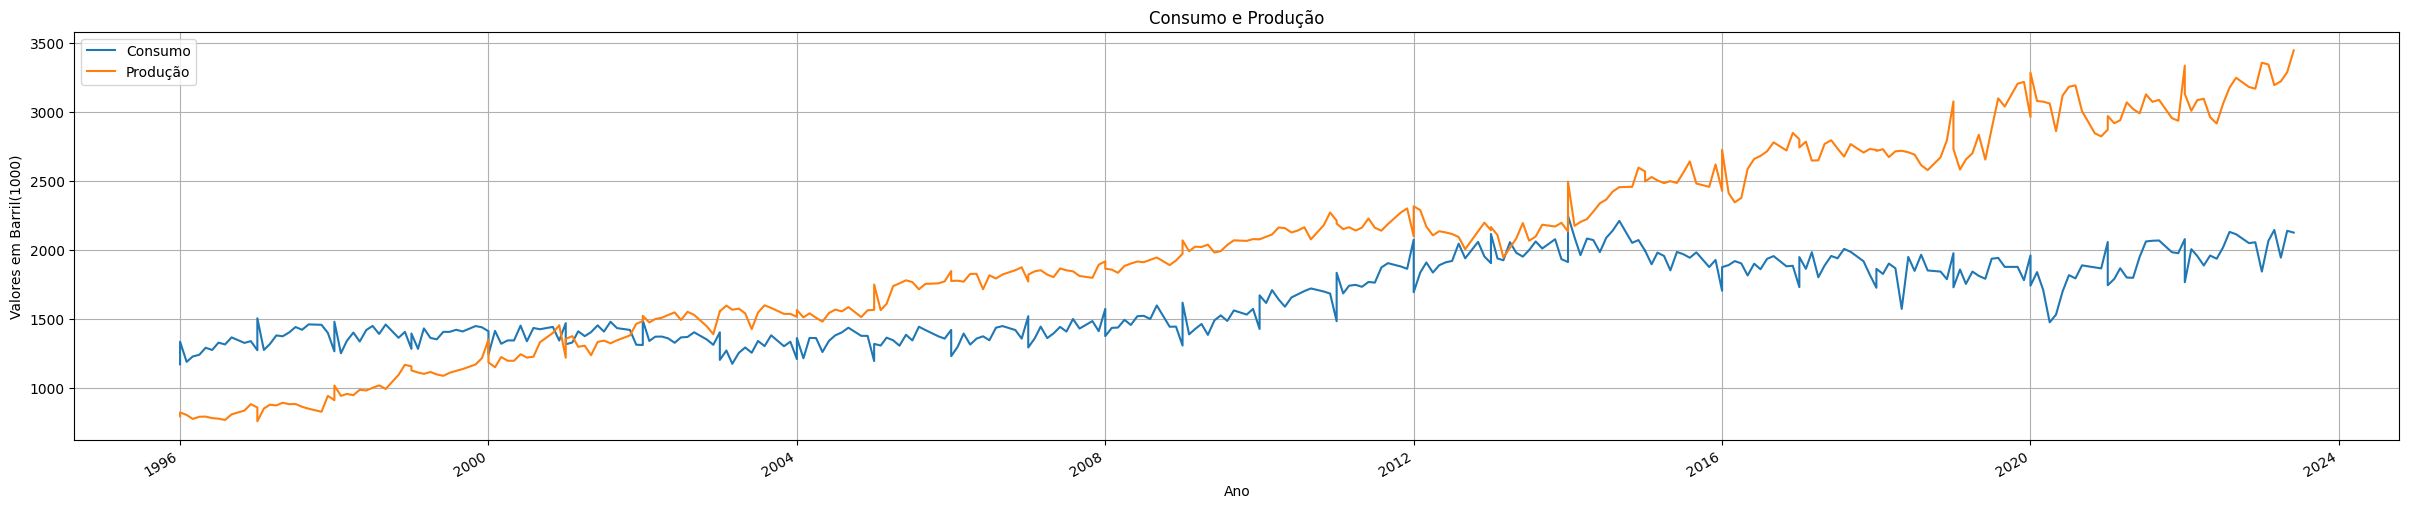

In [ ]:
df[['Consumo', 'Produção']].plot(figsize=(30, 6))
plt.xlabel('Ano')
plt.ylabel('Valores em Barril(1000)')
plt.title('Consumo e Produção')
plt.grid(True)
plt.show()

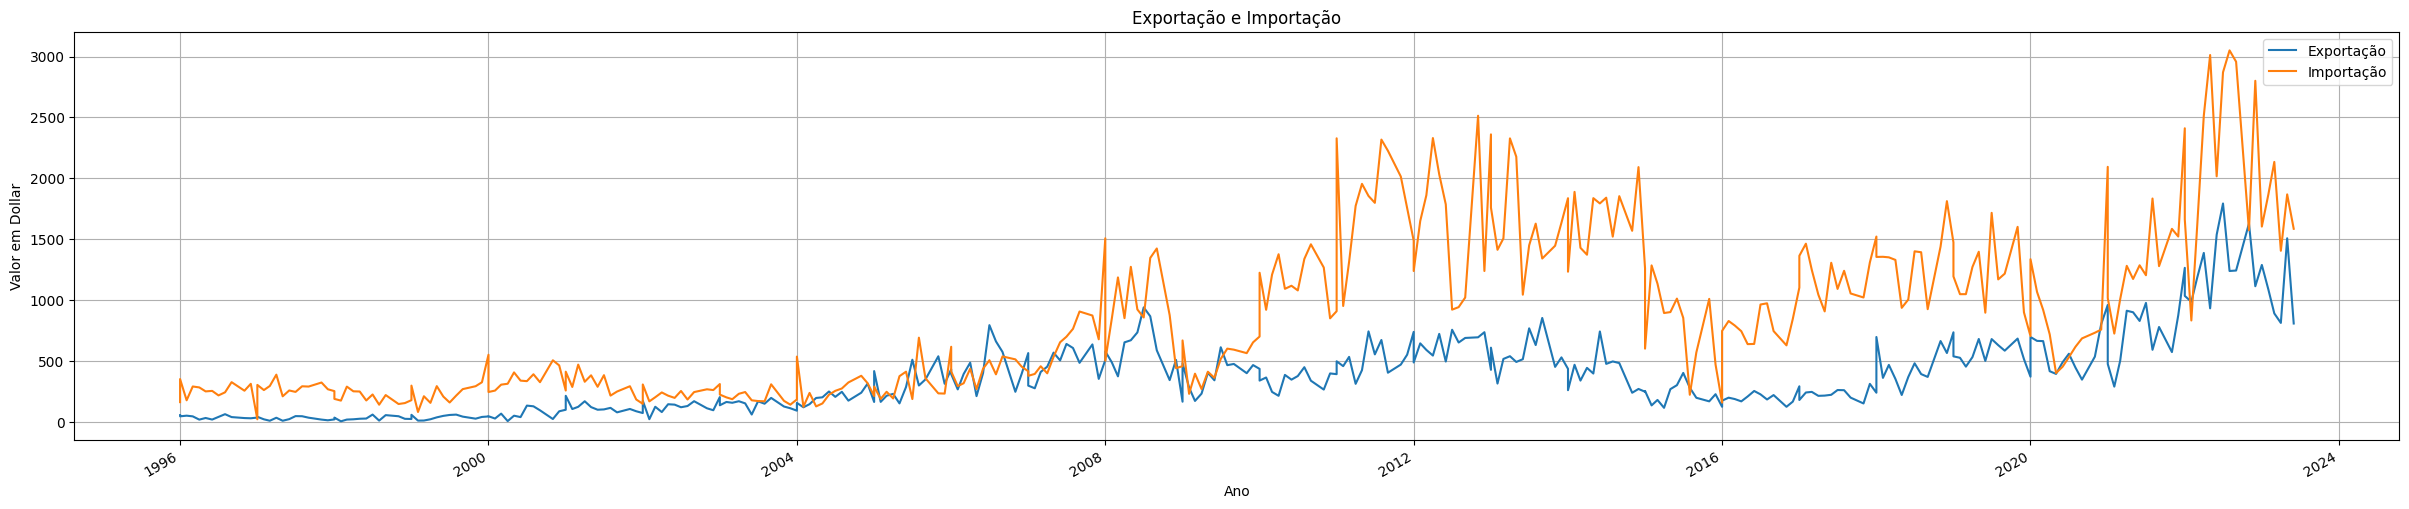

In [ ]:
df[['Exportação', 'Importação']].plot(figsize=(30, 6))
plt.xlabel('Ano')
plt.ylabel('Valor em Dollar')
plt.title('Exportação e Importação')
plt.grid(True)
plt.show()

## Analise de outliers:

 Os outliers são valores que se afastam significativamente do padrão geral dos dados e podem afetar negativamente a precisão de análises estatísticas e modelos preditivos.

<Axes: >

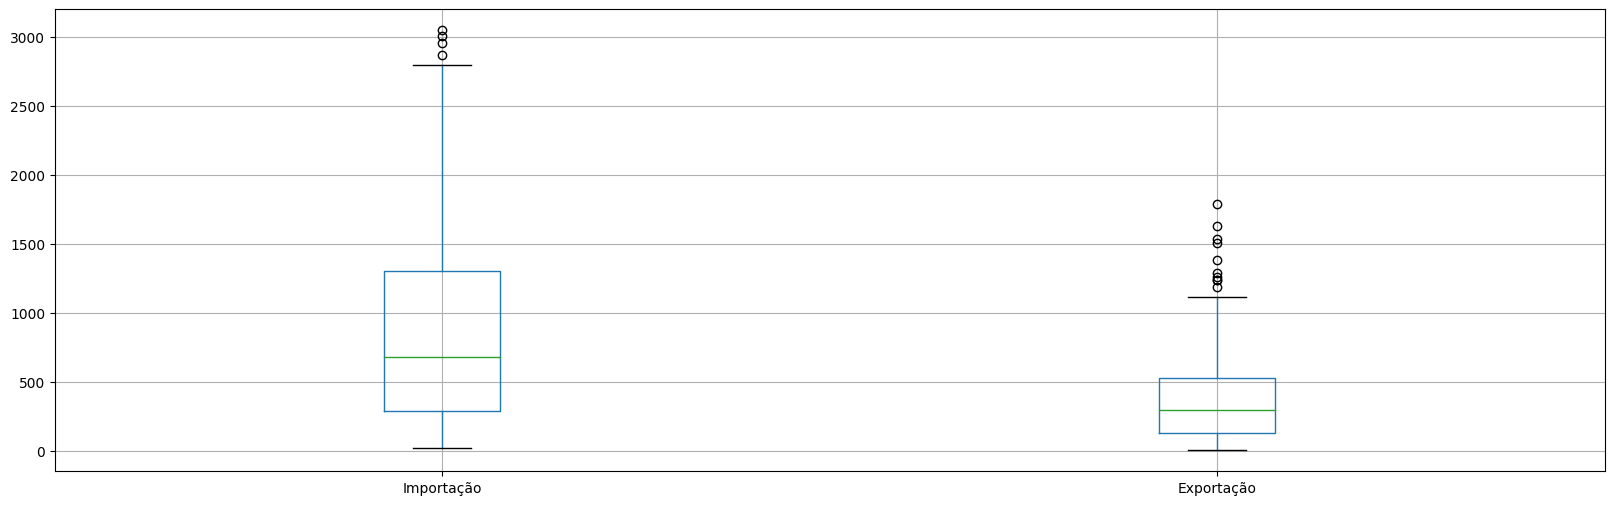

In [ ]:
plt.figure(figsize=(20, 6))
df[['Importação','Exportação']].boxplot()

<Axes: >

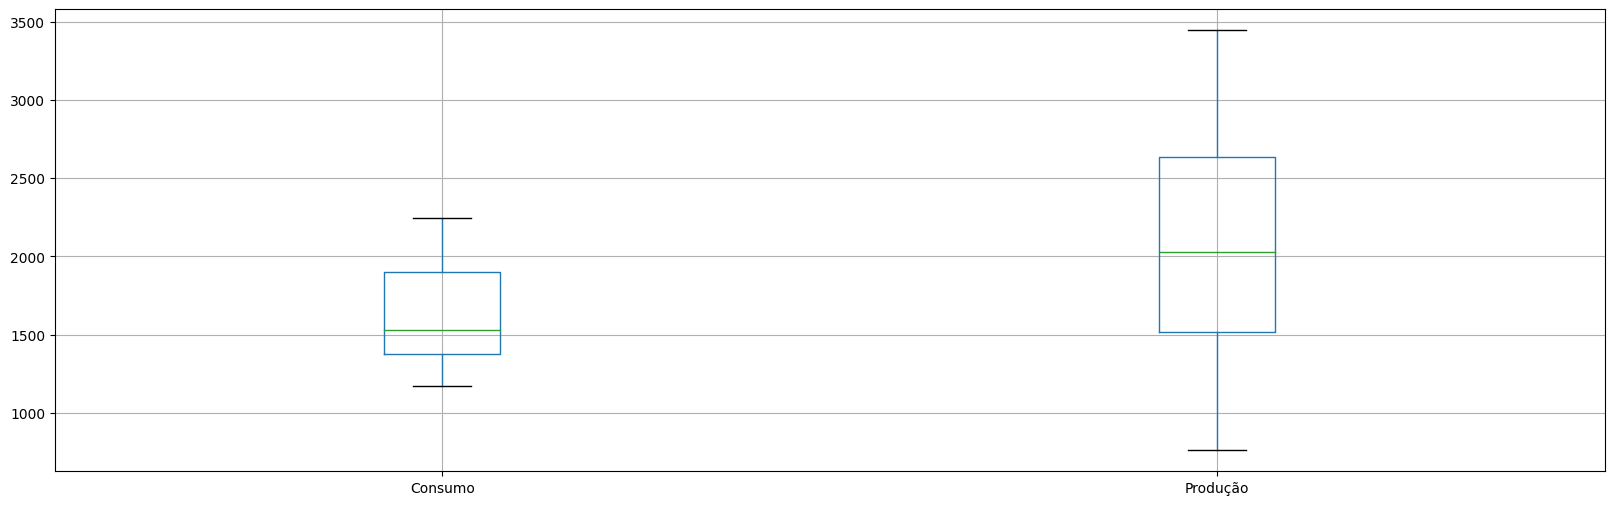

In [ ]:
plt.figure(figsize=(20, 6))
df[['Consumo','Produção']].boxplot()

## Tendência, Sazonalidade e Resíduos(Ruidos).
- Tendências em séries temporais referem-se às mudanças sistemáticas ou direcionais que ocorrem ao longo do tempo. Elas representam o comportamento geral da série em um período de longo prazo, mostrando se há uma inclinação ascendente ou descendente na série.

- A sazonalidade em séries temporais se refere a padrões ou flutuações regulares que ocorrem em intervalos previsíveis ao longo do tempo.

- Os ruídos em um dataset são variações aleatórias e não sistemáticas que podem estar presentes nos dados. Essas variações podem ser causadas por erros de medição, falhas nos sensores, influência de fatores imprevisíveis ou qualquer outro fator que cause flutuações não relacionadas a padrões consistentes nos dados.

<Figure size 2500x800 with 0 Axes>

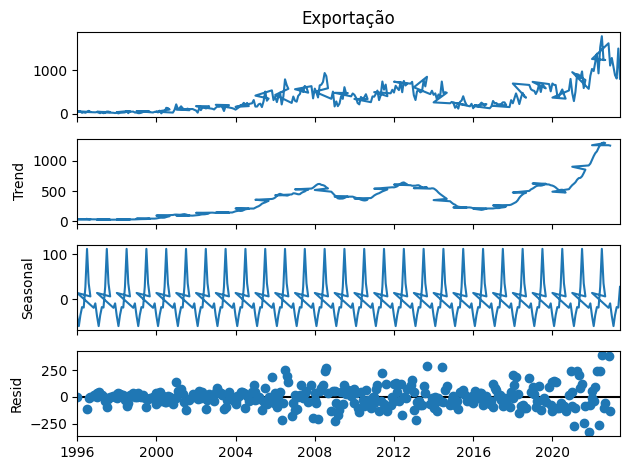

In [ ]:
plt.figure(figsize=(25, 8))
Exportacao = seasonal_decompose(df['Exportação'], period=12)
Exportacao.plot()
plt.show()

<Figure size 2500x800 with 0 Axes>

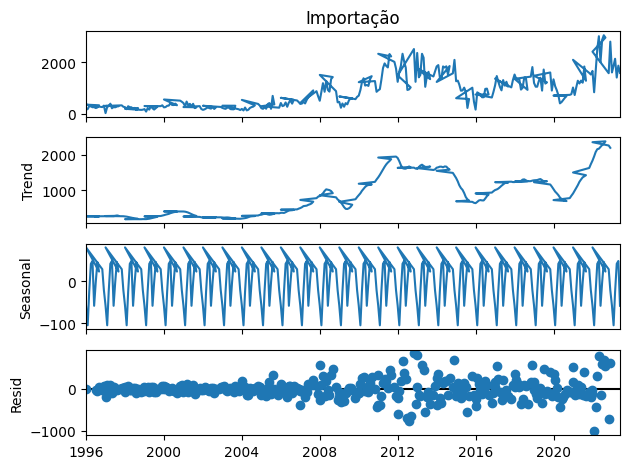

In [ ]:
plt.figure(figsize=(25, 8))
Importacao = seasonal_decompose(df['Importação'], period=12)
Importacao.plot()
plt.show()

<Figure size 2500x800 with 0 Axes>

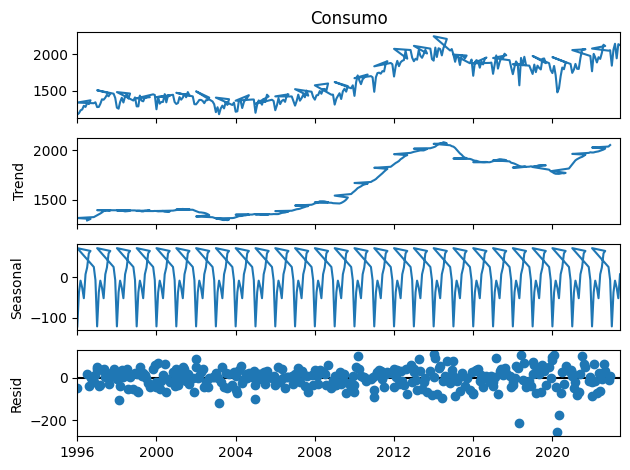

In [ ]:
plt.figure(figsize=(25, 8))
Consumo = seasonal_decompose(df['Consumo'], period=12)
Consumo.plot()
plt.show()

In [ ]:
plt.figure(figsize=(25, 8))
Producao = seasonal_decompose(df['Produção'], period=12)
Producao.plot()
plt.show()

NameError: ignored

## Analisando a Sazonalidade
- Ao contrario da analise de tendencia,para analisar a sazonalidade das pesquisas sobre dieta,precisaremos eliminar a tendência.para tanto utilizamos o conceito de diferenças.

- Diferenças:
 - a diferenciação é um procedimento usado para tornar uma série temporal estacionária. Uma série temporal é considerada estacionária quando suas propriedades estatísticas, como média e variância, permanecem constantes ao longo do tempo. A diferenciação é feita subtraindo o valor atual de um ponto na série temporal pelo valor do ponto anterior. Isso ajuda a remover a tendência de longo prazo, deixando apenas os componentes sazonais e os ruídos.

In [ ]:
df_diff = pd.DataFrame({
    'Exportação': df['Exportação'].diff(),
    'Importação': df['Importação'].diff(),
    'Consumo': df['Consumo'].diff(),
    'Produção': df['Produção'].diff()

})
print(df_diff)

            Exportação  Importação  Consumo  Produção
Data                                                 
1996-01-01         NaN         NaN      NaN       NaN
1996-02-01     -4.3463     15.0565     18.0      10.0
1996-03-01     -5.7128    113.2705     39.0     -29.0
1996-04-01    -26.7546     -7.7134     12.0      16.0
1996-05-01     13.4559    -32.5870     51.0       1.0
...                ...         ...      ...       ...
2023-02-01   -202.1019    264.6703    222.0     -13.0
2023-03-01   -195.6551    265.6976     79.0    -149.0
2023-04-01    -77.9524   -729.1429   -200.0      27.0
2023-05-01    694.4478    462.7173    194.0      66.0
2023-06-01   -699.3409   -282.3523    -13.0     158.0

[330 rows x 4 columns]


<Axes: xlabel='Data'>

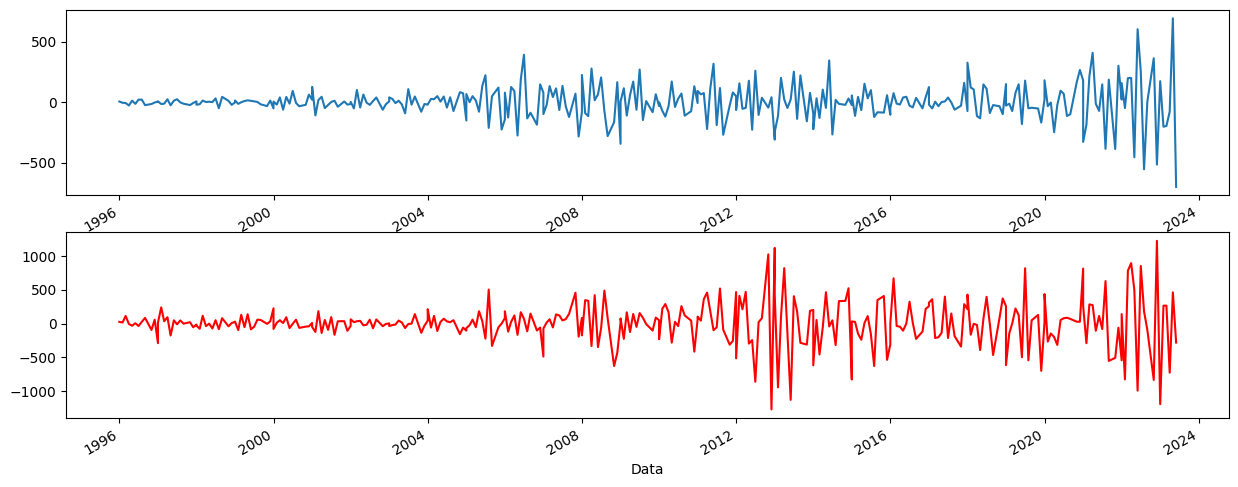

In [ ]:
plt.figure(figsize=(25, 8))
plt.subplot(2, 1, 1)
df.Exportação.diff().plot(figsize=(15,6))
plt.subplot(2, 1, 2)
df.Importação.diff().plot(figsize=(15,6),color = "red")

<Axes: xlabel='Data'>

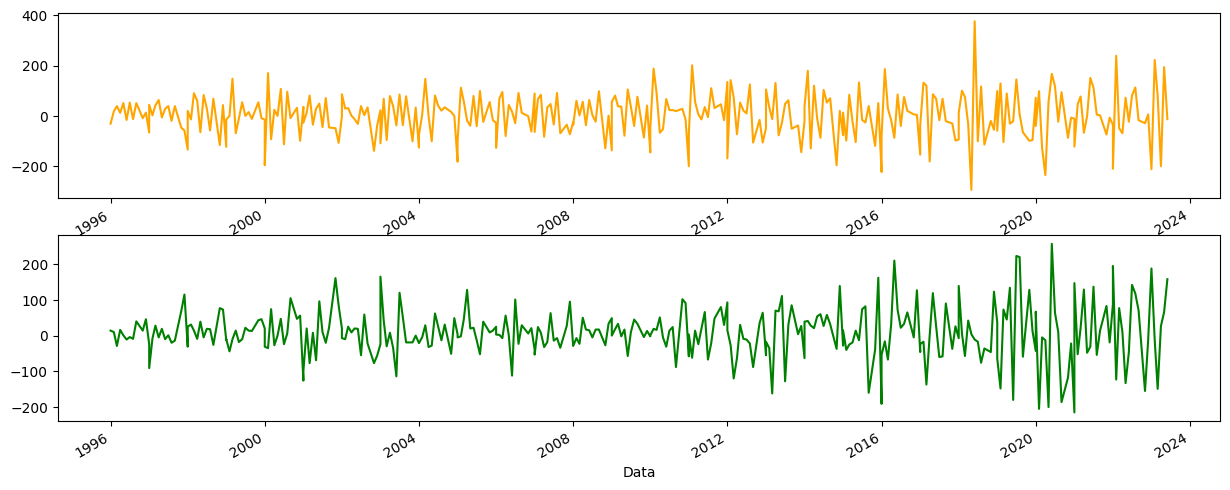

In [ ]:
plt.figure(figsize=(25, 8))
plt.subplot(2, 1, 1)
df.Consumo.diff().plot(figsize=(15,6),color = "orange")
plt.subplot(2, 1, 2)
df.Produção.diff().plot(figsize=(15,6),color = "green")

# Modelos

In [ ]:
data = df.copy()

In [ ]:
# Divida os dados em treinamento e teste
#train_size = int(len(data) * 0.8)
#train, test = data[:train_size], data[train_size:]

In [ ]:
# ARIMA
#endog = train['Exportação']
#model_arima = ARIMA(endog, order=(5, 1, 0))
#model_arima_fit = model_arima.fit()
#predictions_arima = model_arima_fit.forecast(steps=len(test))

In [ ]:
# ETS (Exponential Smoothing)
'''endog = train['Exportação']
model_ets = ExponentialSmoothing(endog, trend='add', seasonal='add', seasonal_periods=12)
model_ets_fit = model_ets.fit()
predictions_ets = model_ets_fit.forecast(steps=len(test))'''

"endog = train['Exportação']\nmodel_ets = ExponentialSmoothing(endog, trend='add', seasonal='add', seasonal_periods=12)\nmodel_ets_fit = model_ets.fit()\npredictions_ets = model_ets_fit.forecast(steps=len(test))"

In [ ]:
# Regressão Linear
'''X_train_scaled = np.arange(len(train)).reshape(-1, 1)
y_train_scaled = train['Exportação'].values.reshape(-1, 1)
X_test_scaled = np.arange(len(train), len(train) + len(test)).reshape(-1, 1)
model_regression = LinearRegression()
model_regression.fit(X_train_scaled, y_train_scaled)
predictions_regression = model_regression.predict(X_test_scaled)
predictions_regression = predictions_regression.flatten()'''

"X_train_scaled = np.arange(len(train)).reshape(-1, 1)\ny_train_scaled = train['Exportação'].values.reshape(-1, 1)\nX_test_scaled = np.arange(len(train), len(train) + len(test)).reshape(-1, 1)\nmodel_regression = LinearRegression()\nmodel_regression.fit(X_train_scaled, y_train_scaled)\npredictions_regression = model_regression.predict(X_test_scaled)\npredictions_regression = predictions_regression.flatten()"

In [ ]:
# Redimensionamento para LSTM
'''scaler = MinMaxScaler()
scaler.fit(train[['Exportação']])
X_train_scaled = scaler.transform(train[['Exportação']])
X_test_scaled = scaler.transform(test[['Exportação']])

X_train_lstm, y_train_lstm = [], []
X_test_lstm, y_test_lstm = [], []

look_back = 12

for i in range(len(X_train_scaled) - look_back):
    X_train_lstm.append(X_train_scaled[i:(i+look_back), 0])
    y_train_lstm.append(X_train_scaled[i+look_back, 0])

for i in range(len(X_test_scaled) - look_back):
    X_test_lstm.append(X_test_scaled[i:(i+look_back), 0])
    y_test_lstm.append(X_test_scaled[i+look_back, 0])

X_train_lstm, y_train_lstm = np.array(X_train_lstm), np.array(y_train_lstm)
X_test_lstm, y_test_lstm = np.array(X_test_lstm), np.array(y_test_lstm)

X_train_lstm = np.reshape(X_train_lstm, (X_train_lstm.shape[0], X_train_lstm.shape[1], 1))
X_test_lstm = np.reshape(X_test_lstm, (X_test_lstm.shape[0], X_test_lstm.shape[1], 1))'''

"scaler = MinMaxScaler()\nscaler.fit(train[['Exportação']])\nX_train_scaled = scaler.transform(train[['Exportação']])\nX_test_scaled = scaler.transform(test[['Exportação']])\n\nX_train_lstm, y_train_lstm = [], []\nX_test_lstm, y_test_lstm = [], []\n\nlook_back = 12\n\nfor i in range(len(X_train_scaled) - look_back):\n    X_train_lstm.append(X_train_scaled[i:(i+look_back), 0])\n    y_train_lstm.append(X_train_scaled[i+look_back, 0])\n\nfor i in range(len(X_test_scaled) - look_back):\n    X_test_lstm.append(X_test_scaled[i:(i+look_back), 0])\n    y_test_lstm.append(X_test_scaled[i+look_back, 0])\n\nX_train_lstm, y_train_lstm = np.array(X_train_lstm), np.array(y_train_lstm)\nX_test_lstm, y_test_lstm = np.array(X_test_lstm), np.array(y_test_lstm)\n\nX_train_lstm = np.reshape(X_train_lstm, (X_train_lstm.shape[0], X_train_lstm.shape[1], 1))\nX_test_lstm = np.reshape(X_test_lstm, (X_test_lstm.shape[0], X_test_lstm.shape[1], 1))"

In [ ]:
# Modelo LSTM
'''model_lstm = Sequential()
model_lstm.add(LSTM(50, input_shape=(look_back, 1)))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mean_squared_error', optimizer='adam')
model_lstm.fit(X_train_lstm, y_train_lstm, epochs=50, batch_size=1, verbose=2)
predictions_lstm = model_lstm.predict(X_test_lstm)
predictions_lstm = scaler.inverse_transform(predictions_lstm)'''

"model_lstm = Sequential()\nmodel_lstm.add(LSTM(50, input_shape=(look_back, 1)))\nmodel_lstm.add(Dense(1))\nmodel_lstm.compile(loss='mean_squared_error', optimizer='adam')\nmodel_lstm.fit(X_train_lstm, y_train_lstm, epochs=50, batch_size=1, verbose=2)\npredictions_lstm = model_lstm.predict(X_test_lstm)\npredictions_lstm = scaler.inverse_transform(predictions_lstm)"

In [ ]:
'''rmse_arima = np.sqrt(mean_squared_error(test['Exportação'], predictions_arima))
rmse_ets = np.sqrt(mean_squared_error(test['Exportação'], predictions_ets))
rmse_regression = np.sqrt(mean_squared_error(test['Exportação'], predictions_regression))
rmse_lstm = np.sqrt(mean_squared_error(test.iloc[look_back:, 0], predictions_lstm))'''

"rmse_arima = np.sqrt(mean_squared_error(test['Exportação'], predictions_arima))\nrmse_ets = np.sqrt(mean_squared_error(test['Exportação'], predictions_ets))\nrmse_regression = np.sqrt(mean_squared_error(test['Exportação'], predictions_regression))\nrmse_lstm = np.sqrt(mean_squared_error(test.iloc[look_back:, 0], predictions_lstm))"

In [ ]:
# Métricas de Avaliação

'''print("RMSE ARIMA:", rmse_arima)
print("RMSE ETS:", rmse_ets)
print("RMSE Regressão Linear:", rmse_regression)
print("RMSE LSTM:", rmse_lstm)'''

'print("RMSE ARIMA:", rmse_arima)\nprint("RMSE ETS:", rmse_ets)\nprint("RMSE Regressão Linear:", rmse_regression)\nprint("RMSE LSTM:", rmse_lstm)'

In [ ]:
# Gráfico das previsões
'''plt.figure(figsize=(12, 6))
# plt.plot(test.index, test.values, label='Observações', color='black')
plt.plot(test.index, predictions_arima, label='ARIMA', color='red')
plt.plot(test.index, predictions_ets, label='ETS', color='green')
plt.plot(test.index, predictions_regression, label='Regressão Linear', color='blue')
plt.plot(test.index[look_back:], predictions_lstm, label='LSTM', color='purple')
plt.legend()
plt.show()'''

"plt.figure(figsize=(12, 6))\n# plt.plot(test.index, test.values, label='Observações', color='black')\nplt.plot(test.index, predictions_arima, label='ARIMA', color='red')\nplt.plot(test.index, predictions_ets, label='ETS', color='green')\nplt.plot(test.index, predictions_regression, label='Regressão Linear', color='blue')\nplt.plot(test.index[look_back:], predictions_lstm, label='LSTM', color='purple')\nplt.legend()\nplt.show()"